## <p style="text-align: right;"> &#9989; Nic Wiggins</p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Inner Products

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Pleiades_large.jpg/1200px-Pleiades_large.jpg" width="50%">


<p style="text-align: right;">Image from: https://www.wikipedia.org/</p>
    

### Agenda for today's class (80 minutes)

</p>

1. (10 minutes) Review Cautionary Example (Multiplication in numpy)
1. (10 minutes) Pre-class Assignment Review
1. (20 minutes) Relativity
1. (20 minutes) Function Approximation
1. (20 minutes) Fourier Transforms

---

# 1. Review Cautionary Example (Multiplication in numpy)

Pay close attention to the "type" of data you are working with.  There are three types you may come across when working with 2D data:

1. Lists of lists
2. numpy arrays
3. numpy matrices

Multiplication on each of these three data types act differently.  

In [1]:
import numpy as np

# Here is a list of lists
A =[[3.0,1.0],
    [2.0,2.0]]    
B =[[ 10, 1 ],
   [-1,  10]]
C =[[ 10, 1, 3 ],
   [-1,  10, 5]]

In [2]:
#Can't Multiply lists of lists directly
A*B

TypeError: can't multiply sequence by non-int of type 'list'

In [3]:
#Here is the multiplication if we cast as numpy arrays
C1 = np.array(A)*np.array(B)
C1

array([[30.,  1.],
       [-2., 20.]])

In [4]:
#Here is the same multiplication if we cast as numpy matrix
C2 = np.matrix(A)*np.matrix(B)
C2

matrix([[29., 13.],
        [18., 22.]])

In [5]:
#Notice that both multiplies return a 4x4 array but they are NOT the same!!!!
np.allclose(C1,C2)

False

In [6]:
#You can use the "type" command to figure out what you are working with

print("A is ",type(A))
print("B is ",type(B))
print("C1 is ",type(C1))
print("C2 is ",type(C2))

A is  <class 'list'>
B is  <class 'list'>
C1 is  <class 'numpy.ndarray'>
C2 is  <class 'numpy.matrixlib.defmatrix.matrix'>


In [7]:
#Here is the multiplication if we cast as numpy arrays, 
# it does not work if they have different sizes and can not be broadcasted.
C1 = np.array(A)*np.array(C)
C1

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

In [8]:
#Here is the same multiplication if we cast as numpy matrix
C2 = np.matrix(A)*np.matrix(C)
C2

matrix([[29., 13., 14.],
        [18., 22., 16.]])

---
# 2. Pre-class Assignment Review

[18--Inner_Product](../preclass/18--Inner_Product-pre-class-assignment.ipynb)

---
# 3. Minkowski Geometry
Consider the following pseudo inner-product which is used to model special relativity in $R^4$:

$$\langle X,Y \rangle = -x_1y_1 - x_2y_2 -x_3y_3 + x_4y_4.$$

It has the following norm and distance:

$$\| X \| =  \sqrt{|\langle X,X \rangle|}\\
d(X,Y) =  \| X - Y \| = \| ( x_1 - y_1, x_2-y_2, x_3 - y_3, x_4 - y_4) \| \\
\qquad\qquad\quad  =  \sqrt{-(x_1 - y_1)^2 - (x_2-y_2)^2 - (x_3 - y_3)^2 + (x_4 - y_4)^2}$$

<font color=red>** QUESTION:**</font> The Minkowski Geometry is called pseudo because it violates one of the inner product axioms. Discuss the axioms in your group and decide which one it violates.

violates the positive definite axiom, if the last value is 0 then for sure negative

## The Physical Interpretation of Minkowski Geometry

> The distance between two points on the path of an observer, such as Twin 2, in Minkowski geometry corresponds to the time recorded by that observer in traveling between the two points

Let $P=(0,0,0,0)$, $R=(4,0,0,5)$, and $Q=(0,0,0,10)$. 

- $d(P, Q) =10$ means that Twin 1 ages 10 years from $P$ to $Q$.
- $d(P, R) =3$ means that Twin 2 ages 3 years in traveling from $P$ to $R$. 
- $d(R, Q) =3$ means taht Twin 2 ages 3 years in traveling from $R$ to $Q$.
- The time from $P->R->Q$ is shorter than $P->Q$. 

<font color=red>** QUESTION:**</font> The star cluster Pleiades in the constellation Taurus is 410 light years from Earth. A traveler to the cluster traveling at constant speed ages 40 years on a round trip. By the time the traveler returns to Earth, how many centuries will have passed on Earth?  **Hint:** follow the example in the book on page 365 (section 6.2).

Put your answer to the above quesiton here

In [9]:
##ANSWER##
d = np.sqrt(20**2+410**2)
d*2
##ANSWER##

820.9750300709517

<font color=red>** QUESTION:**</font> How fast was the traveler going?

Speed of light

---

# 4. Function Approximation

**Definition:** Let $C[a,b]$ be a vector space of all possible continuous functions over the interval $[a,b]$ with inner product:
$$\langle f,g \rangle = \int_a^b f(x)g(x) dx.$$

Now let $f$ be an element of $C[a,b]$, and $W$ be a subspace of $C[a,b]$. The function $g \in W$ such that $\int_a^b \left[ f(x) - g(x) \right]^2 dx$ is a minimum is called the **least-squares approximation** to $f$.


 The least-squares approximation to $f$ in the subspace $W$ can be calculated as the projection of $f$ onto $W$:
 
 $$g = proj_Wf$$
 
 If $\{g_1, \ldots, g_n\}$ is an orthonormal basis for $W$, we can replace the dot product of $R^n$ by an inner product of the function space and get:
 
 $$prog_Wf = \langle f,g_1 \rangle g_1 + \ldots + \langle f,g_n \rangle g_n$$
 
 
###  Polynomial Approximations

An orthogonal bases for all polynomials of degree less than or equal to $n$ can be computed using Gram-schmidt orthogonalization process.  First we start with the following standard basis vectors in $W$

$$ \{ 1, x, \ldots, x^n \}$$

The Gram-Schmidt process can be used to make these vectors orthogonal. The resulting polynomials on $[-1,1]$ are called  **Legendre polynomials**.  The first six Legendre polynomial basis are:

$$1$$
$$x$$
$$x^2 -\frac{1}{3}$$
$$x^3 - \frac{3}{5}x$$
$$x^4 - \frac{6}{7}x^2 + \frac{3}{35}$$
$$x^5 - \frac{10}{9}x^3 + \frac{5}{12}x$$

<font color=red>** QUESTION:**</font> What are the least-squares linear approximations of $f(x) = e^x$ over the interval $[-1, 1]$. In other words  the projection of $f$ onto $W$ where $W$ is a first order polynomal with basis vectors $\{1, x\} (i.e. $n=1$)$. (Hint: You give the answer in integrals without computing the integrals. Note the Legendre polynomials are not normalized.)

Put your answer to the above question here.

Here is a plot of the equation $f(x) = e^x$:

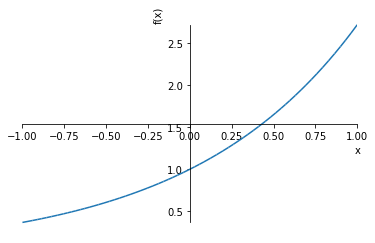

In [13]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np


#px = np.linspace(-1,1,100)
#py = np.exp(px)
#plt.plot(px,py, color='red');
import sympy as sym
from sympy.plotting import plot
x = sym.symbols('x')
f = sym.exp(x)
plot(f,(x,-1,1))

We can use **sympy** to compute the integral. The following code compute the definite integral of 
$$\int_{-1}^1 e^x dx.$$
In fact, **sympy** can also compute the indefinite integral by removing the interval.

In [12]:
sym.init_printing()
x = sym.symbols('x')
sym.integrate('exp(x)',(x, -1, 1))
# sym.integrate('exp(x)',(x))

<font color=red>**DO THIS:**</font> Use **sympy** to compute the first order polynomial that approximates the function $e^x$.
The following calculates the above approximation written in ```Sympy```:

In [25]:
import mpmath as mp

In [79]:
# basis above is orthoginal but not normalized
# g1 integrate 1 from -1 to 1 is 2, to normalize 1/2 
sym.integrate('1**2',(x, -1, 1))

In [83]:
# for g1 = 1/2
f1 = sym.integrate('1*exp(x)',(x, -1, 1))*1/2
f1

In [74]:
# g2 is x, but we need to normalize - to normalize multiply with 3/2 -> 3/2x
sym.integrate('x**2',(x, -1, 1))

In [81]:
# <f,g2>*g2
f2 = sym.integrate('x*exp(x)',(x, -1, 1))*3/2*x
f2

<font color=red>** QUESTION:**</font> Plot the original function $f(x)=e^x$ and it's approximation.

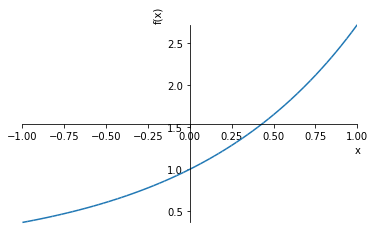

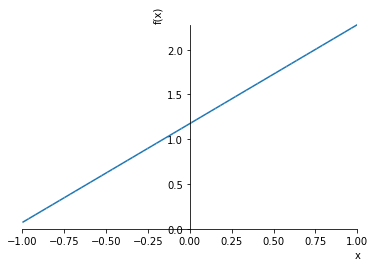

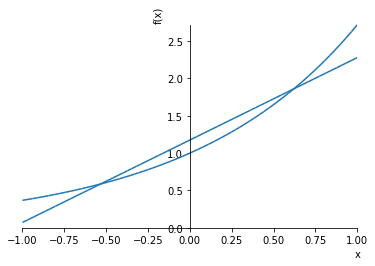

In [82]:
p1 = plot(f,(x,-1,1))
#####Start your code here #####
p2 = plot(f1+f2,(x,-1,1))
p1.append(p2[0])
p1.show()
#####End of your code here#####

In [64]:
#For fun, I turned this into a function:
x = sym.symbols('x')

def lsf_poly(f, gb = [1,  x], a =-1, b=1):
    proj = 0
    for g in gb:
#        print(sym.integrate(g*f,(x,a,b)))
        proj = proj + sym.integrate(g*f,(x,a,b))/sym.integrate(g*g,(x,a,b))*g
    return proj

lsf_poly(sym.exp(x))

<font color=red>** QUESTION:**</font> What would a second order approximation look like for this function?

Put your answer to the above question here

### Fourier Approximations

Now, we consider the trigonometric polynomials spanned by the set $\{ 1, \cos x, \sin x, \ldots \cos nx, \sin nx\}$ over $[-\pi,\pi]$, where $n$ is a positive integer. 
It can be shown that these vectors are already orthogonal and thus form a basis. 
If we divide the vectors by their magnitudes, we get the following orthonormal basis:

$$\{g_0, \ldots, g_2n\} = \left\{ \frac{1}{\sqrt{2\pi}}, \frac{1}{\sqrt{\pi}} \cos{x}, \ldots, \frac{1}{\sqrt{\pi}} \sin{x}, \frac{1}{\sqrt{\pi}}\cos{nx}, \frac{1}{\sqrt{\pi}} \sin{nx} \right\}$$

If we project function $f$ onto this basis, we get the following trigonometric approximation:

$$g(x) = a_0 + \sum_{k=1}^n \left( a_k \cos{kx} + b_k \sin{kx} \right) $$

where the coefficients $a_0,a_1,b_1, \ldots, a_n,b_n$ are defined as:

$$a_0 = \langle {f, \frac{1}{\sqrt{2\pi}}} \rangle \frac{1}{\sqrt{2\pi}} = \frac{1}{{2\pi}} \int_{-\pi}^{\pi} f(x) dx$$

$$a_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{kx} dx$$

$$b_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{kx} dx$$

The above set of equations is know as the Fourier series. Using the Fourier series we can approximate any functions with sin's and cos's.

In **Example 2** of section 6.3 of the textbook, we see that the Fourier approximation to $f(x) = x$ over the interval $\left[ -\pi, \pi \right]$ is:

$$ g(x) = \sum_{k=1}^{n} \frac{2(-1)^{k+1}}{k} \sin{kx}$$

Taking $n = 4$ we get the forth-order approximation:

$$g(x) = 2\left(\sin x - \frac{1}{2} \sin{2x} + \frac{1}{3} \sin{3x} - \frac{1}{4} \sin{4x}\right)$$

<font color=red>**QUESTION:**</font> Find the fourth-order Fourier approximations to $f(x) = 1+x$ over $[-\pi,\pi]$.


Put your answer to the above question here

<font color=red>**DO THIS:**</font> Visualize the fourth order approximation of $f(x)=x$. Then **modify the order** to visualize the fourth-order approximation of $f(x)=1+x$.

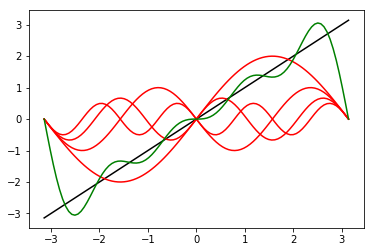

In [50]:
x = np.linspace(-np.pi,np.pi,100)
y = x
g1 = 2*np.sin(x)
g2 = -np.sin(2*x)
g3 = 2*np.sin(3*x)/3
g4 = -2*np.sin(4*x)/4
gg = g1+g2+g3+g4
plt.plot(x,y, color='black')
plt.plot(x,g1, color='red')
plt.plot(x,g2, color='red')
plt.plot(x,g3, color='red')
plt.plot(x,g4, color='red')
plt.plot(x,gg, color='green')

Let's look at the approximation with different orders from 1 to 4.

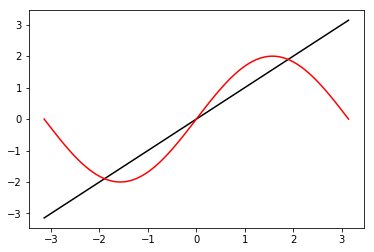

In [51]:
# First-order
plt.plot(x,y, color='black')
plt.plot(x,g1, color='red')

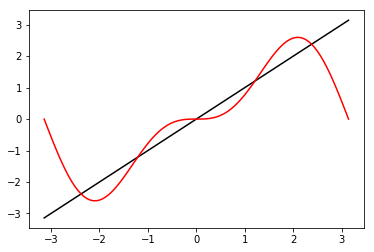

In [52]:
# Second-order
plt.plot(x,y, color='black')
plt.plot(x,g1+g2, color='red')

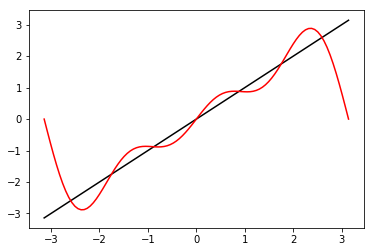

In [53]:
# Third-order
plt.plot(x,y, color='black')
plt.plot(x,g1+g2+g3, color='red')

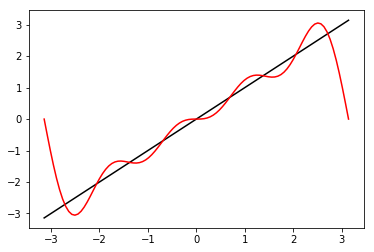

In [49]:
# Fourth-order
plt.plot(x,y, color='black')
plt.plot(x,g1+g2+g3+g4, color='red')

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees